# Visualizing with pyspiceql

## Setup

Install the necessary packages into your conda environment:

```
mamba install -c conda-forge python-dateutil matplotlib numpy spiceql
```

## Import modules

In [1]:
import pyspiceql as pql
import numpy as np 

from dateutil import parser
from matplotlib import pyplot as plt

## Get Start and Stop Times 

In [2]:
start_et, start_et_kernels = pql.utcToEt("2019-01-01", False)
stop_et, stop_et_kernels = pql.utcToEt("2019-01-02", False)

# get an array of times in regular intervals throughout the exposure 
ets = np.linspace(start=start_et, stop=stop_et, num=1000)
print("num ets:", len(ets))
dates = [parser.parse(pql.etToUtc(et, format="C", precision=10, searchKernels=True)[0]) for et in ets]
start_et, stop_et

num ets: 1000


(599572869.1839148, 599659269.1839437)

## Get Orientations and Convert to Euler Angles

In [3]:
def quaternion_to_ypr(quats):
    qw, qx, qy, qz = orientations[:,:4].transpose()
    
    yaw = np.degrees(np.arctan2(2.0*(qy*qz + qw*qx), qw*qw - qx*qx - qy*qy + qz*qz));
    pitch = np.degrees(np.arcsin(-2.0*(qx*qz - qw*qy)));
    roll = np.degrees(np.arctan2(2.0*(qx*qy + qw*qz), qw*qw + qx*qx - qy*qy - qz*qz));
    return yaw, pitch, roll

# get orientations relative to the moon 
inst_frame, inst_frame_kernels = pql.translateNameToCode("LRO_LROCNACL", "lro")
target_frame, target_frame_kernels = pql.translateNameToCode("IAU_MOON", "base")
print("Instrument Frame: ", inst_frame)
print("Target Frame: ", target_frame)

orientations, orientations_kernels = pql.getTargetOrientations(ets=ets, toFrame=-85000, refFrame=target_frame, mission="lroc", useWeb=False, searchKernels=True)
orientations = np.asarray(orientations)

yaw, pitch, roll = quaternion_to_ypr(orientations)

Instrument Frame:  -85600
Target Frame:  10020


## Use Matplotlib to Make Some Basic Plots

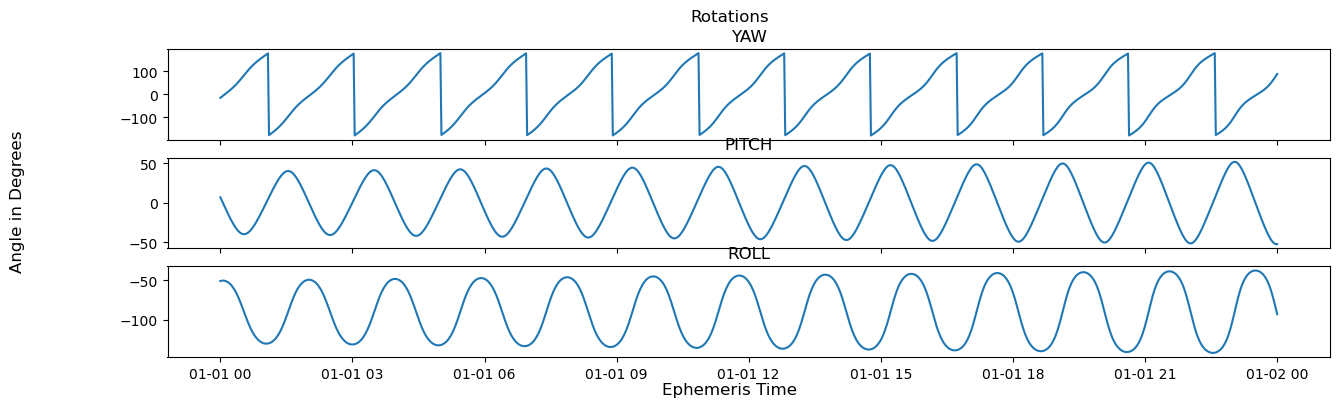

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)
fig.suptitle(f'Rotations')
fig.set_figheight(4)
fig.set_figwidth(15)
ax1.plot(dates, yaw)
ax1.set_title("YAW")
ax2.plot(dates, pitch)
ax2.set_title("PITCH")
ax3.plot(dates, roll)
ax3.set_title("ROLL")
fig.supxlabel("Ephemeris Time")
fig.supylabel("Angle in Degrees")
plt.show()

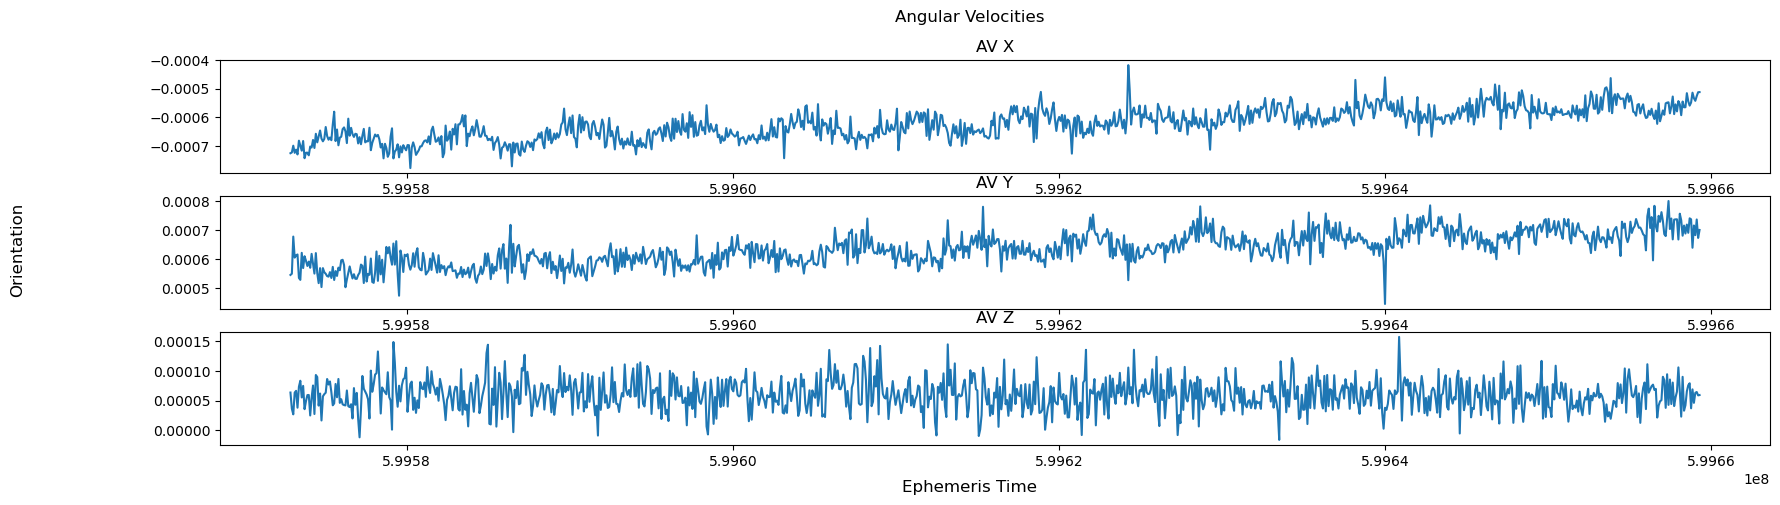

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
fig.suptitle(f'Angular Velocities')
fig.set_figheight(5)
fig.set_figwidth(20)
ax1.plot(ets, orientations[:, 4])
ax1.set_title("AV X")
ax2.plot(ets, orientations[:, 5])
ax2.set_title("AV Y")
ax3.plot(ets, orientations[:, 6])
ax3.set_title("AV Z")
fig.supxlabel("Ephemeris Time")
fig.supylabel("Orientation")
plt.show()